<a href="https://colab.research.google.com/github/sb2356-iiitr/ML_Projects/blob/main/Clustering/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving studentclusters.csv to studentclusters.csv
User uploaded file "studentclusters.csv" with length 346 bytes


In [ ]:
# Import Pandas for data processing
import pandas as pd

In [ ]:
# Read the dataset
data = pd.read_csv('studentclusters.csv')
X = data.copy()

In [ ]:
X.head()

,marks,shours
0,72,20.0
1,42,19.0
2,77,7.0
3,93,22.0
4,30,20.0


In [ ]:
X.shape

(49, 2)

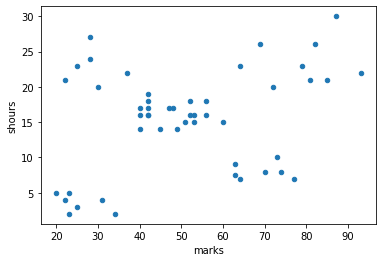

In [ ]:
# Visualize the data using Pandas
X.plot.scatter(x='marks', y='shours')

In [ ]:
# Normalize the data using standard or min-max
from sklearn.preprocessing import minmax_scale
X_scaled = minmax_scale(X)

In [ ]:
# Import KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=1234)

In [ ]:
# Fit the data to get the clusters
kmeans.fit(X_scaled)
labels = kmeans.labels_
labels

array([2, 0, 4, 2, 3, 0, 4, 3, 2, 4, 2, 4, 0, 2, 3, 0, 0, 3, 0, 2, 3, 4,
       0, 0, 0, 1, 0, 0, 3, 0, 1, 1, 4, 1, 0, 1, 0, 0, 0, 4, 1, 0, 2, 0,
       2, 0, 0, 1, 2], dtype=int32)

In [ ]:
# Visualize the clusters
labels = pd.DataFrame(labels)
df = pd.concat([X, labels], axis=1)
df = df.rename(columns = {0:'labels'})

In [ ]:
df.head()

,marks,shours,labels
0,72,20.0,2
1,42,19.0,0
2,77,7.0,4
3,93,22.0,2
4,30,20.0,3


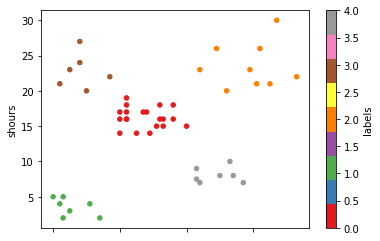

In [ ]:
df.plot.scatter(x='marks', y='shours', c='labels', colormap='Set1')

In [ ]:
# Elbow Method for optimum clusters
inertia = []
for i in range(2, 16):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Squared Sum (Inertia)')

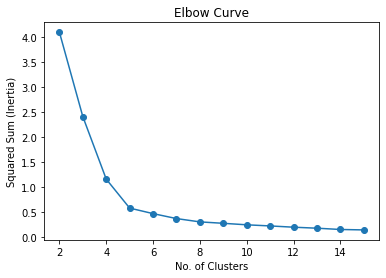

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(2, 16), inertia, marker='o')
plt.title('Elbow Curve')
plt.xlabel('No. of Clusters')
plt.ylabel('Squared Sum (Inertia)')